# Papadiamantis Texts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(context='notebook', style='ticks')

import sys
import os

module_path = os.path.abspath('/home/jmisi/Data Science/Papadiamantis_project/Notebooks')
if module_path not in sys.path:
    sys.path.append(module_path)

from loading_documents import directory_to_documents, num_tokens_from_string

## Text statistics

In [2]:
directory_path = "/home/jmisi/Data Science/Papadiamantis_project/Notebooks/1. Scraping/texts"
documents = directory_to_documents(directory_path, split_chapters=False)
documents.keys()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 6976.30it/s]
0it [00:00, ?it/s]
100%|██████████| 4/4 [00:00<00:00, 2043.76it/s]
0it [00:00, ?it/s]
100%|██████████| 172/172 [00:00<00:00, 2194.30it/s]


dict_keys(['Άρθρα', 'Ποιήματα', 'Μυθιστορήματα', 'Διηγήματα'])

In [3]:
texts_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    texts_df = pd.concat([texts_df, df])

texts_df.info()
texts_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 171
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        266 non-null    object
 1   theme       266 non-null    object
 2   title       266 non-null    object
 3   year        266 non-null    int64 
 4   Κείμενο     266 non-null    object
 5   tokens      266 non-null    int64 
 6   characters  266 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.6+ KB


,type,theme,title,year,Κείμενο,tokens,characters
0,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Περὶ τοῦ βίου τοῦ Ι. Χριστοῦ μέχρι τοῦ τριακοσ...,4723,4159
1,Άρθρα,Θρησκευτικά,ΧΡΙΣΤΟΥΓΕΝΝΑ,0,Ἐὰν τὸ Πάσχα εἶναι ἡ λαμπροτάτη τοῦ Χριστιανισ...,5593,4950
2,Άρθρα,Θρησκευτικά,Η ΕΒΔΟΜΑΣ ΤΗΣ ΔΙΑΚΑΙΝΗΣΙΜΟΥ,0,"Ἀπὸ τῆς σήμερον, ἢ μᾶλλον ἀπὸ τῆς χθές, ἀρχίζε...",3197,2805
3,Άρθρα,Θρησκευτικά,ΤΑ ΜΝΗΜΟΣΥΝΑ ΚΑΙ ΤΟ ΚΑΘΑΡΤΗΡΙΟΝ,0,Λίαν ἀξιοπρεπῶς ἀπήντησεν ὁ αἰδ. δὸμ Παῦλος εἰ...,4575,4019
4,Άρθρα,Θρησκευτικά,ΤΕΛΕΥΤΑΙΑ ΑΠΑΝΤΗΣΙΣ ΕΙΣ ΤΟΝ «ΛΟΓΟΝ»,0,"Διὰ σᾶς καὶ τοὺς ὁμοίους σας ἐγράφη τό, «Θυμὸς...",1780,1542


In [4]:
texts_df.type.value_counts().to_frame().rename_axis('Κειμενικά είδη').rename(columns={'count':'#'}).style.set_properties(**{'width': '100px'})

,#
Κειμενικά είδη,
Διηγήματα,172
Άρθρα,70
Ποιήματα,21
Μυθιστορήματα,3


In [5]:
texts_df[ texts_df.type == 'Διηγήματα' ].describe().T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Διηγήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Διηγήματα,,,,
year,1.904,1.904,1.885,1.954
tokens,17.994,11.431,2.972,204.388
characters,16.028,10.214,2.640,181.540


In [6]:
texts_df[ texts_df.type == 'Άρθρα' ].describe()[['tokens', 'characters']].T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Άρθρα').style.format(precision=0, thousands=".")

,average,median,min,max
Άρθρα,,,,
tokens,6.543,4.360,120,31.800
characters,5.810,3.877,90,28.237


In [7]:
texts_df[ texts_df.type == 'Ποιήματα' ].describe()[['tokens', 'characters']].T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Ποιήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Ποιήματα,,,,
tokens,2.383,1.198,169,21.437
characters,2.142,1.112,147,18.965


In [8]:
texts_df[ texts_df.type == 'Μυθιστορήματα' ].describe().T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Μυθιστορήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Μυθιστορήματα,,,,
year,1.882,1.882,1.879,1.884
tokens,439.945,419.546,253.358,646.930
characters,387.072,369.387,223.558,568.270


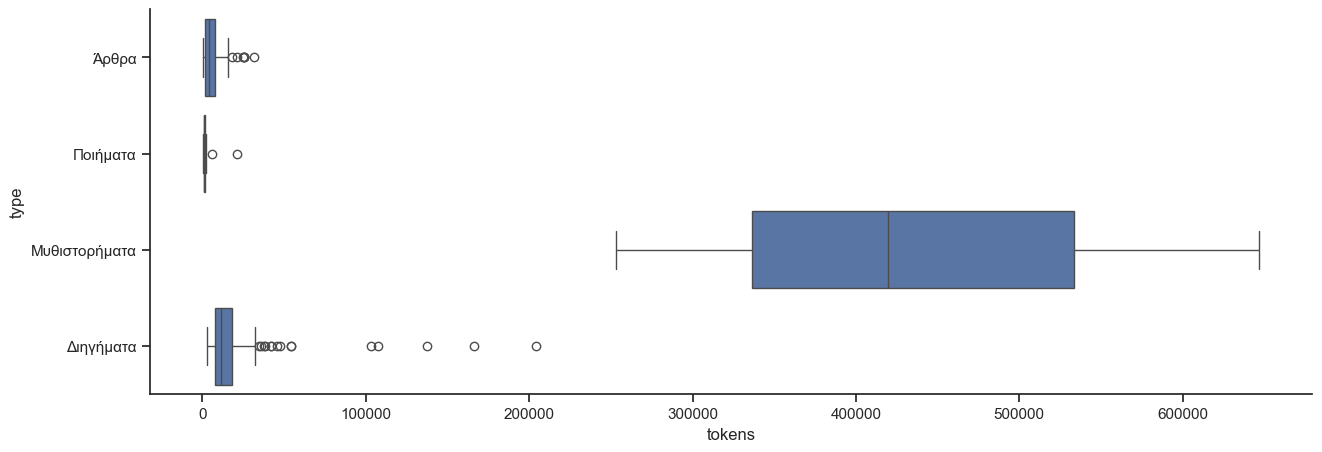

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(data=texts_df, x='tokens', y='type');
sns.despine()

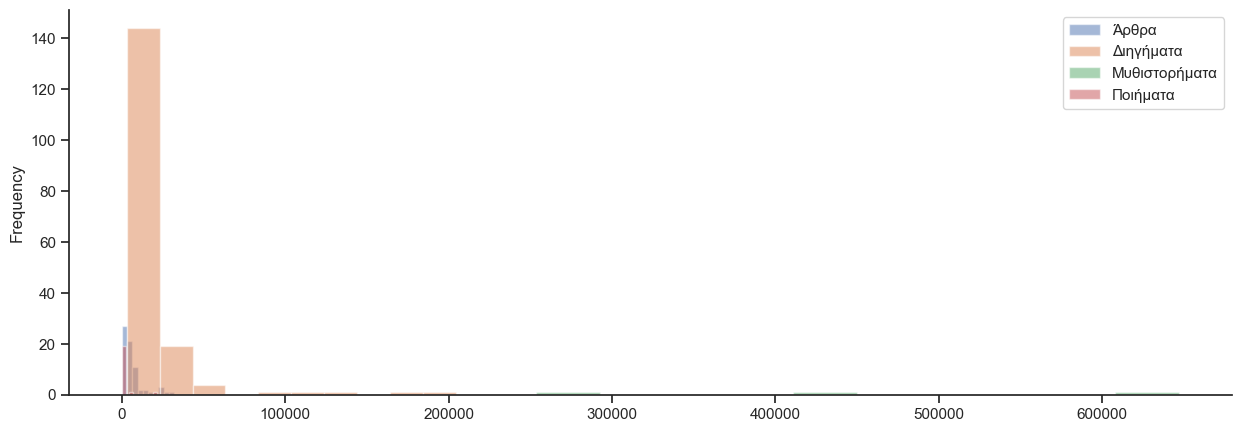

In [10]:
plt.figure(figsize=(15,5))
texts_df.groupby('type').tokens.plot.hist(legend=True, alpha=0.5)
sns.despine();

## Chapters and chunks

In [11]:
directory_path = "/home/jmisi/Data Science/Papadiamantis_project/Notebooks/1. Scraping/texts"
documents = {}
documents = directory_to_documents(directory_path, split_chapters=True)

texts_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    texts_df = pd.concat([texts_df, df])

texts_df.info()
texts_df.head()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 7775.23it/s]
0it [00:00, ?it/s]
100%|██████████| 4/4 [00:00<00:00, 2890.63it/s]
0it [00:00, ?it/s]
100%|██████████| 172/172 [00:00<00:00, 2092.20it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 171
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        367 non-null    object
 1   theme       367 non-null    object
 2   title       367 non-null    object
 3   year        367 non-null    int64 
 4   chapter     367 non-null    object
 5   Κείμενο     367 non-null    object
 6   tokens      367 non-null    int64 
 7   characters  367 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 25.8+ KB


,type,theme,title,year,chapter,Κείμενο,tokens,characters
0,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,Περὶ τοῦ βίου τοῦ Ι. Χριστοῦ μέχρι τοῦ τριακοσ...,4723,4159
1,Άρθρα,Θρησκευτικά,ΧΡΙΣΤΟΥΓΕΝΝΑ,0,Not applied,Ἐὰν τὸ Πάσχα εἶναι ἡ λαμπροτάτη τοῦ Χριστιανισ...,5593,4950
2,Άρθρα,Θρησκευτικά,Η ΕΒΔΟΜΑΣ ΤΗΣ ΔΙΑΚΑΙΝΗΣΙΜΟΥ,0,Not applied,"Ἀπὸ τῆς σήμερον, ἢ μᾶλλον ἀπὸ τῆς χθές, ἀρχίζε...",3197,2805
3,Άρθρα,Θρησκευτικά,ΤΑ ΜΝΗΜΟΣΥΝΑ ΚΑΙ ΤΟ ΚΑΘΑΡΤΗΡΙΟΝ,0,Not applied,Λίαν ἀξιοπρεπῶς ἀπήντησεν ὁ αἰδ. δὸμ Παῦλος εἰ...,4575,4019
4,Άρθρα,Θρησκευτικά,ΤΕΛΕΥΤΑΙΑ ΑΠΑΝΤΗΣΙΣ ΕΙΣ ΤΟΝ «ΛΟΓΟΝ»,0,Not applied,"Διὰ σᾶς καὶ τοὺς ὁμοίους σας ἐγράφη τό, «Θυμὸς...",1780,1542


In [12]:
from text_splitters import (text_splitter,
                            novel_splitter,
                            article_splitter,
                            short_story_splitter,
                            hymn_splitter)

splitters = {'Άρθρα' : article_splitter, 'Ποιήματα': hymn_splitter, 'Μυθιστορήματα': novel_splitter, 'Διηγήματα': short_story_splitter}

In [13]:
documents.keys()

dict_keys(['Άρθρα', 'Ποιήματα', 'Μυθιστορήματα', 'Διηγήματα'])

In [14]:
chunks = []
for type in documents.keys():
    chunks.extend(text_splitter(splitters[type], documents[type]))

In [15]:
chunks_df = pd.DataFrame([doc.metadata for doc in chunks])
chunks_df['Κείμενο'] = [doc.page_content for doc in chunks]
chunks_df['tokens'] = chunks_df['Κείμενο'].map(num_tokens_from_string)
chunks_df.info()
chunks_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     7056 non-null   object
 1   theme    7056 non-null   object
 2   title    7056 non-null   object
 3   year     7056 non-null   int64 
 4   chapter  7056 non-null   object
 5   chunk    7056 non-null   int64 
 6   Κείμενο  7056 non-null   object
 7   tokens   7056 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 441.1+ KB


,type,theme,title,year,chapter,chunk,Κείμενο,tokens
0,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,0,Περὶ τοῦ βίου τοῦ Ι. Χριστοῦ μέχρι τοῦ τριακοσ...,598
1,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,1,«Μετανοεῖτε» ἦτο ἡ οὐσία τοῦ κηρύγματος αὐτοῦ·...,488
2,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,2,Καὶ ταῦτα λέγων ἐβάπτιζε τὰ πλήθη ἐν ταῖς ὄχθα...,401
3,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,3,Ἀλλ᾿ ὁ Ἰησοῦς: «εἶναι πρέπον νὰ ἐκπληρώσωμεν π...,583
4,Άρθρα,Θρησκευτικά,ΤΑ ΑΓΙΑ ΘΕΟΦΑΝΕΙΑ,0,Not applied,4,"Ἐφάνησαν αὐτῷ οἱ οὐρανοὶ ἀνοιγόμενοι, τὸ Ἅγ. Π...",598


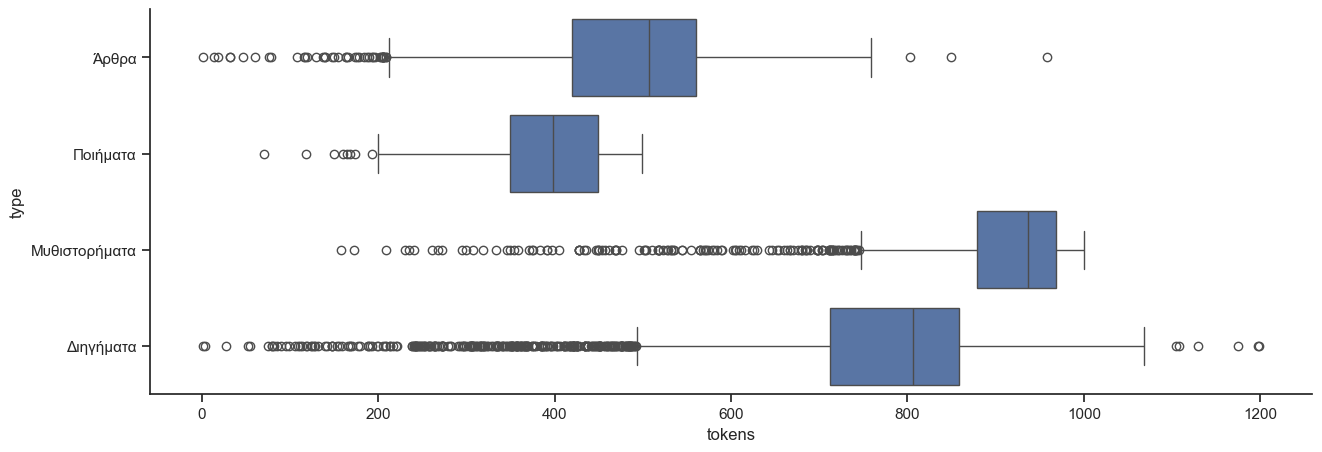

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=chunks_df, x='tokens', y='type');
sns.despine()

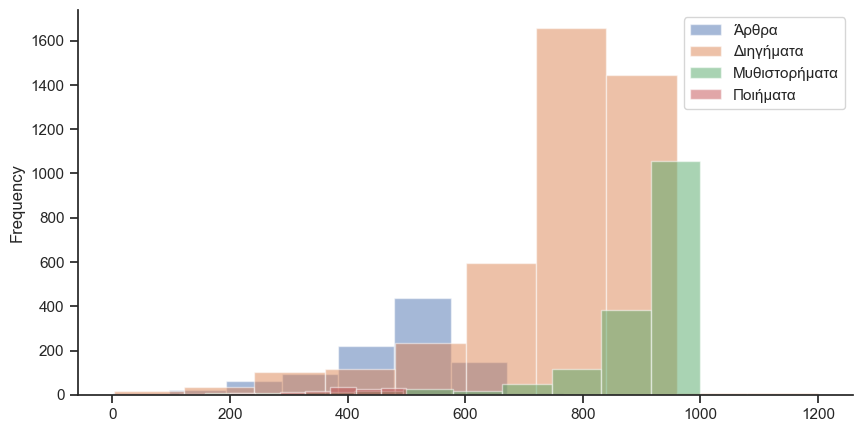

In [17]:
plt.figure(figsize=(10,5))
chunks_df.groupby('type').tokens.plot.hist(legend=True, alpha=0.5)
sns.despine();